In [2]:
#importing
import pandas as pd

In [3]:
#to find all the files required
import glob

In [4]:
#collect and sort 
files = sorted(glob.glob("data/regional-in-weekly-*.csv"))

In [5]:
#combine all and have continues index
combined = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [6]:
# Save new CSV
combined.to_csv("data/spotify_all_weeks_combined.csv", index=False)

In [7]:
print("Combined file saved as: data/spotify_all_weeks_combined.csv")

Combined file saved as: data/spotify_all_weeks_combined.csv


In [8]:
combined.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
0,1,spotify:track:0eCajpR75pDW0r64U6hP2x,Anuv Jain,Jo Tum Mere Ho,Universal Music India Pvt. Ltd. (on behalf of ...,1,1,21,6734459
1,2,spotify:track:3vCzLB6kS2lGcIpm1OOUsy,"Anurag Saikia, Raj Shekhar, Romy, Amarabha Ban...",Ishq Hai,Netflix Music,2,2,3,6681446
2,3,spotify:track:4vHRQnzGcKEtqsLH70tAms,"Sachet-Parampara, Parampara Tandon, Kausar Munir","Raanjhan (From ""Do Patti"")",T-Series,2,3,11,5670328
3,4,spotify:track:2plbrEY59IikOBgBGLjaoe,"Lady Gaga, Bruno Mars",Die With A Smile,Interscope,4,4,14,5480132
4,5,spotify:track:4ulroyDK6rN73nVkCkWhur,"Jasleen Royal, Stebin Ben, Vijay Deverakonda, ...",Sahiba,Warner Music India,5,6,6,5120142


In [9]:
combined.columns

Index(['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank',
       'previous_rank', 'weeks_on_chart', 'streams'],
      dtype='object')

In [10]:
combined = combined.drop(columns=["uri", "previous_rank"])

In [11]:
combined.columns

Index(['rank', 'artist_names', 'track_name', 'source', 'peak_rank',
       'weeks_on_chart', 'streams'],
      dtype='object')

In [12]:
combined.head()

,rank,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
0,1,Anuv Jain,Jo Tum Mere Ho,Universal Music India Pvt. Ltd. (on behalf of ...,1,21,6734459
1,2,"Anurag Saikia, Raj Shekhar, Romy, Amarabha Ban...",Ishq Hai,Netflix Music,2,3,6681446
2,3,"Sachet-Parampara, Parampara Tandon, Kausar Munir","Raanjhan (From ""Do Patti"")",T-Series,2,11,5670328
3,4,"Lady Gaga, Bruno Mars",Die With A Smile,Interscope,4,14,5480132
4,5,"Jasleen Royal, Stebin Ben, Vijay Deverakonda, ...",Sahiba,Warner Music India,5,6,5120142


In [13]:
combined.tail()

,rank,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
8993,196,"Vishal-Shekhar, Papon, Irshad Kamil",Bulleya,YRF Music,30,43,1354149
8994,197,"Yo Yo Honey Singh, Athar Hayat, Sameer Hayat","Jhoom Sharaabi (From ""De De Pyaar De 2"")",T-Series,197,1,1351654
8995,198,"Himesh Reshammiya, Ankit Tiwari, Palak Muchhal",Sanam Teri Kasam,Sony Music / EROS Music,1,39,1351594
8996,199,"Khesari Lal Yadav, Masoom Sharma, Dev Negi, Pr...","Panwadi (From ""Sunny Sanskari Ki Tulsi Kumari"")",Sony Music Entertainment India Pvt. Ltd.,135,6,1346003
8997,200,"Vishal-Shekhar, Akon, Hamsika Iyer, Vishal Dad...",Chammak Challo,T-Series,105,60,1338470


In [14]:
combined = combined.drop(columns=["rank"])

In [15]:
combined.head()

,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
0,Anuv Jain,Jo Tum Mere Ho,Universal Music India Pvt. Ltd. (on behalf of ...,1,21,6734459
1,"Anurag Saikia, Raj Shekhar, Romy, Amarabha Ban...",Ishq Hai,Netflix Music,2,3,6681446
2,"Sachet-Parampara, Parampara Tandon, Kausar Munir","Raanjhan (From ""Do Patti"")",T-Series,2,11,5670328
3,"Lady Gaga, Bruno Mars",Die With A Smile,Interscope,4,14,5480132
4,"Jasleen Royal, Stebin Ben, Vijay Deverakonda, ...",Sahiba,Warner Music India,5,6,5120142


In [16]:
# 1️⃣ Split artist names into lists
combined["artist_names"] = combined["artist_names"].str.split(",")

# 2️⃣ Remove extra spaces around names
combined["artist_names"] = combined["artist_names"].apply(lambda x: [a.strip() for a in x])

# 3️⃣ Explode — one row per artist
combined = combined.explode("artist_names", ignore_index=True)

print("✅ After explode:", len(combined), "rows")
combined.head()


✅ After explode: 21917 rows


,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
0,Anuv Jain,Jo Tum Mere Ho,Universal Music India Pvt. Ltd. (on behalf of ...,1,21,6734459
1,Anurag Saikia,Ishq Hai,Netflix Music,2,3,6681446
2,Raj Shekhar,Ishq Hai,Netflix Music,2,3,6681446
3,Romy,Ishq Hai,Netflix Music,2,3,6681446
4,Amarabha Banerjee,Ishq Hai,Netflix Music,2,3,6681446


In [17]:
combined.tail()

,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
21912,Vishal-Shekhar,Chammak Challo,T-Series,105,60,1338470
21913,Akon,Chammak Challo,T-Series,105,60,1338470
21914,Hamsika Iyer,Chammak Challo,T-Series,105,60,1338470
21915,Vishal Dadlani,Chammak Challo,T-Series,105,60,1338470
21916,Niranjan Iyengar,Chammak Challo,T-Series,105,60,1338470


In [18]:
combined.head(50)

,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
0,Anuv Jain,Jo Tum Mere Ho,Universal Music India Pvt. Ltd. (on behalf of ...,1,21,6734459
1,Anurag Saikia,Ishq Hai,Netflix Music,2,3,6681446
2,Raj Shekhar,Ishq Hai,Netflix Music,2,3,6681446
3,Romy,Ishq Hai,Netflix Music,2,3,6681446
4,Amarabha Banerjee,Ishq Hai,Netflix Music,2,3,6681446
5,Varun Jain,Ishq Hai,Netflix Music,2,3,6681446
6,Madhubanti Bagchi,Ishq Hai,Netflix Music,2,3,6681446
7,Mismatched - Cast,Ishq Hai,Netflix Music,2,3,6681446
8,Sachet-Parampara,"Raanjhan (From ""Do Patti"")",T-Series,2,11,5670328
9,Parampara Tandon,"Raanjhan (From ""Do Patti"")",T-Series,2,11,5670328


In [19]:
combined.head(200)

,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
0,Anuv Jain,Jo Tum Mere Ho,Universal Music India Pvt. Ltd. (on behalf of ...,1,21,6734459
1,Anurag Saikia,Ishq Hai,Netflix Music,2,3,6681446
2,Raj Shekhar,Ishq Hai,Netflix Music,2,3,6681446
3,Romy,Ishq Hai,Netflix Music,2,3,6681446
4,Amarabha Banerjee,Ishq Hai,Netflix Music,2,3,6681446
...,...,...,...,...,...,...
195,Alisha Chinai,Tera Hone Laga Hoon,Tips Industries Ltd,33,190,1796980
196,Pritam,Tera Hone Laga Hoon,Tips Industries Ltd,33,190,1796980
197,Amaal Mallik,Soch Na Sake,T-Series,46,105,1782324
198,Arijit Singh,Soch Na Sake,T-Series,46,105,1782324


In [20]:
combined.head()

,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
0,Anuv Jain,Jo Tum Mere Ho,Universal Music India Pvt. Ltd. (on behalf of ...,1,21,6734459
1,Anurag Saikia,Ishq Hai,Netflix Music,2,3,6681446
2,Raj Shekhar,Ishq Hai,Netflix Music,2,3,6681446
3,Romy,Ishq Hai,Netflix Music,2,3,6681446
4,Amarabha Banerjee,Ishq Hai,Netflix Music,2,3,6681446


In [21]:
combined.to_csv("data/spotify_all_weeks_combined.csv", index=False)

In [22]:
# sort by song name, then by artist name (A → Z)
combined = combined.sort_values(["track_name", "artist_names"], ascending=[True, True]).reset_index(drop=True)

# quick check
combined.head(10)


,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
0,Jenny Johal,0008,Sidhu Moose Wala,111,1,1651890
1,Jenny Johal,0008,Sidhu Moose Wala,111,2,1556057
2,Jenny Johal,0008,Sidhu Moose Wala,111,3,1435787
3,Sidhu Moose Wala,0008,Sidhu Moose Wala,111,1,1651890
4,Sidhu Moose Wala,0008,Sidhu Moose Wala,111,2,1556057
5,Sidhu Moose Wala,0008,Sidhu Moose Wala,111,3,1435787
6,The Kidd,0008,Sidhu Moose Wala,111,1,1651890
7,The Kidd,0008,Sidhu Moose Wala,111,2,1556057
8,The Kidd,0008,Sidhu Moose Wala,111,3,1435787
9,Chahal Saab,2 Khatole,Tuffan Music,179,1,1302552


In [23]:
# Step 2 — update each duplicate set to its max values
combined["streams"] = combined.groupby(["track_name", "artist_names"])["streams"].transform("max")
combined["weeks_on_chart"] = combined.groupby(["track_name", "artist_names"])["weeks_on_chart"].transform("max")

print("✅ Streams and weeks_on_chart updated to their maximum values for each song–artist pair")


✅ Streams and weeks_on_chart updated to their maximum values for each song–artist pair


In [24]:
combined.to_csv("data/spotify_all_weeks_combined.csv", index=False)
print("✅ Updated file saved with max streams & weeks_on_chart: data/spotify_all_weeks_combined.csv")


✅ Updated file saved with max streams & weeks_on_chart: data/spotify_all_weeks_combined.csv


In [25]:
combined = combined.drop_duplicates(subset=["track_name", "artist_names"], keep="first").reset_index(drop=True)

print("✅ Duplicates removed. Now each song–artist pair appears only once.")


✅ Duplicates removed. Now each song–artist pair appears only once.


In [26]:
combined.to_csv("data/spotify_all_weeks_combined.csv", index=False)
print("✅ Final cleaned file saved: data/spotify_all_weeks_combined.csv")


✅ Final cleaned file saved: data/spotify_all_weeks_combined.csv


In [27]:
import pandas as pd

# Load your cleaned combined dataset
combined = pd.read_csv("data/spotify_all_weeks_combined.csv")

# See first few rows
combined.head()


,artist_names,track_name,source,peak_rank,weeks_on_chart,streams
0,Jenny Johal,0008,Sidhu Moose Wala,111,3,1651890
1,Sidhu Moose Wala,0008,Sidhu Moose Wala,111,3,1651890
2,The Kidd,0008,Sidhu Moose Wala,111,3,1651890
3,Chahal Saab,2 Khatole,Tuffan Music,179,11,2955361
4,Manjeet Mor,2 Khatole,Tuffan Music,179,11,2955361


In [28]:
# Get a quick overview — column names, data types, non-null counts
combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   artist_names    1374 non-null   object
 1   track_name      1374 non-null   object
 2   source          1374 non-null   object
 3   peak_rank       1374 non-null   int64 
 4   weeks_on_chart  1374 non-null   int64 
 5   streams         1374 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 64.5+ KB


In [29]:
# See numerical statistics like mean, min, max for streams, weeks_on_chart, etc.
combined.describe().T


,count,mean,std,min,25%,50%,75%,max
peak_rank,1374.0,9.281368e+01,6.790180e+01,1.0,24.0,94.0,158.00,200.0
weeks_on_chart,1374.0,4.803421e+01,6.933799e+01,1.0,4.0,17.0,64.00,336.0
streams,1374.0,2.504280e+06,2.041992e+06,1195003.0,1492825.0,1881485.0,2643056.25,26355165.0


In [30]:
# Count how many missing (null) values are in each column
combined.isnull().sum()


artist_names      0
track_name        0
source            0
peak_rank         0
weeks_on_chart    0
streams           0
dtype: int64

In [31]:
# Number of unique songs and unique artists
print("🎵 Unique Songs:", combined["track_name"].nunique())
print("🎤 Unique Artists:", combined["artist_names"].nunique())


🎵 Unique Songs: 543
🎤 Unique Artists: 569


In [32]:
# Top 10 songs with highest total streams
top_songs = combined.sort_values("streams", ascending=False).head(10)

# Display relevant info
top_songs[["track_name", "artist_names", "streams", "weeks_on_chart", "peak_rank"]]


,track_name,artist_names,streams,weeks_on_chart,peak_rank
1007,"Saiyaara (From ""Saiyaara"")",Faheem Abdullah,26355165,18,89
1006,"Saiyaara (From ""Saiyaara"")",Arslan Nizami,26355165,18,89
1008,"Saiyaara (From ""Saiyaara"")",Irshad Kamil,26355165,18,89
1009,"Saiyaara (From ""Saiyaara"")",Tanishk Bagchi,26355165,18,89
992,Sahiba,Aditya Rikhari,12797116,18,1
951,"Raanjhan (From ""Do Patti"")",Sachet-Parampara,9492013,55,2
950,"Raanjhan (From ""Do Patti"")",Parampara Tandon,9492013,55,2
949,"Raanjhan (From ""Do Patti"")",Kausar Munir,9492013,55,2
276,"Dhun (From ""Saiyaara"")",Mithoon,9409254,16,5
275,"Dhun (From ""Saiyaara"")",Arijit Singh,9409254,16,5


In [33]:
# Top 10 songs that stayed the longest on the Top 200 chart
longest_chart = combined.sort_values("weeks_on_chart", ascending=False).head(10)
longest_chart[["track_name", "artist_names", "weeks_on_chart", "streams"]]


,track_name,artist_names,weeks_on_chart,streams
1236,"Tujhe Kitna Chahne Lage (From ""Kabir Singh"")",Mithoon,336,3901950
65,"Agar Tum Saath Ho (From ""Tamasha"")",Alka Yagnik,336,3704179
66,"Agar Tum Saath Ho (From ""Tamasha"")",Arijit Singh,336,3704179
1235,"Tujhe Kitna Chahne Lage (From ""Kabir Singh"")",Arijit Singh,336,3901950
854,Pal,Shreya Ghoshal,335,1778197
850,Pal,Arijit Singh,335,1778197
851,Pal,Javed-Mohsin,335,1778197
852,Pal,Kunaal Vermaa,335,1778197
853,Pal,Prashant Ingole,335,1778197
544,"Kaise Hua (From ""Kabir Singh"")",Vishal Mishra,334,2660676


In [34]:
# Count how many songs each artist has in the chart
artist_counts = combined["artist_names"].value_counts().head(10)
artist_counts


artist_names
Arijit Singh            60
Pritam                  50
Shreya Ghoshal          25
Karan Aujla             23
Amitabh Bhattacharya    22
Sachin-Jigar            21
Anirudh Ravichander     20
Masoom Sharma           19
Irshad Kamil            17
Atif Aslam              17
Name: count, dtype: int64

In [35]:
import shutil

shutil.copy("data/spotify_all_weeks_combined.csv", "data/spotify_songs_view.csv")
print("✅ Duplicated successfully → data/spotify_songs_view.csv")


✅ Duplicated successfully → data/spotify_songs_view.csv


In [36]:
import os
os.path.exists("data/spotify_songs_view.csv")


True

In [37]:
import pandas as pd

# Load the duplicated songs_view file
songs_view = pd.read_csv("data/spotify_songs_view.csv")

# Drop duplicate song names (keep the first occurrence)
songs_view = songs_view.drop_duplicates(subset=["track_name"], keep="first").reset_index(drop=True)

# Save the cleaned version
songs_view.to_csv("data/spotify_songs_view.csv", index=False)

print("✅ Duplicates removed — now each song name appears only once in data/spotify_songs_view.csv")
print("Total unique songs:", len(songs_view))


✅ Duplicates removed — now each song name appears only once in data/spotify_songs_view.csv
Total unique songs: 543


In [38]:
# Drop the artist_names column
songs_view = songs_view.drop(columns=["artist_names"])

# Save the updated CSV
songs_view.to_csv("data/spotify_songs_view.csv", index=False)

print("✅ 'artist_names' column dropped and file updated: data/spotify_songs_view.csv")


✅ 'artist_names' column dropped and file updated: data/spotify_songs_view.csv


In [39]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
songs = pd.read_csv("data/spotify_songs_view.csv")       # song-level (unique songs)
artists = pd.read_csv("data/spotify_all_weeks_combined.csv")  # artist-level

# Set seaborn style
sns.set(style="whitegrid")


In [40]:
# Basic info & summary stats
songs.info()
songs.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   track_name      543 non-null    object
 1   source          543 non-null    object
 2   peak_rank       543 non-null    int64 
 3   weeks_on_chart  543 non-null    int64 
 4   streams         543 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.3+ KB


,count,mean,std,min,25%,50%,75%,max
peak_rank,543.0,9.168324e+01,6.832384e+01,1.0,23.5,90.0,158.0,200.0
weeks_on_chart,543.0,5.285083e+01,7.237965e+01,1.0,5.0,21.0,67.5,336.0
streams,543.0,2.427729e+06,1.832517e+06,1195003.0,1485731.5,1876693.0,2607316.0,26355165.0


In [41]:
# Count nulls per column
songs.isnull().sum()


track_name        0
source            0
peak_rank         0
weeks_on_chart    0
streams           0
dtype: int64

In [42]:
# Relationship between streams, weeks_on_chart, and peak_rank
songs[["streams", "weeks_on_chart", "peak_rank"]].corr()


,streams,weeks_on_chart,peak_rank
streams,1.000000,-0.024522,-0.220342
weeks_on_chart,-0.024522,1.000000,-0.533490
peak_rank,-0.220342,-0.533490,1.000000


In [43]:
# Sort by streams (descending)
top_songs = songs.sort_values("streams", ascending=False).head(10)
top_songs[["track_name", "streams", "weeks_on_chart", "peak_rank"]]


,track_name,streams,weeks_on_chart,peak_rank
399,"Saiyaara (From ""Saiyaara"")",26355165,18,89
396,Sahiba,12797116,18,1
378,"Raanjhan (From ""Do Patti"")",9492013,55,2
114,"Dhun (From ""Saiyaara"")",9409254,16,5
207,Jhol,9203336,21,95
136,Finding Her,9124718,35,66
494,"Tum Ho Toh (From ""Saiyaara"")",8656855,16,8
400,Saiyaara Reprise - Female,8481535,16,6
138,For A Reason,8405250,11,15
175,"Humsafar (From ""Saiyaara"")",8260495,16,11


In [44]:
# Sort by longevity (weeks_on_chart)
longest_songs = songs.sort_values("weeks_on_chart", ascending=False).head(10)
longest_songs[["track_name", "weeks_on_chart", "streams", "peak_rank"]]


,track_name,weeks_on_chart,streams,peak_rank
491,"Tujhe Kitna Chahne Lage (From ""Kabir Singh"")",336,3901950,2
25,"Agar Tum Saath Ho (From ""Tamasha"")",336,3704179,4
343,Pal,335,1778197,34
220,"Kaise Hua (From ""Kabir Singh"")",334,2660676,5
217,Kabira,321,2232115,31
127,"Duniyaa (From ""Luka Chuppi"")",311,1445032,1
421,Shayad,303,2106009,1
23,Ae Dil Hai Mushkil Title Track,301,2202046,79
118,Dil Diyan Gallan,299,2631003,53
453,"Tera Ban Jaunga (From ""Kabir Singh"")",296,2051572,4


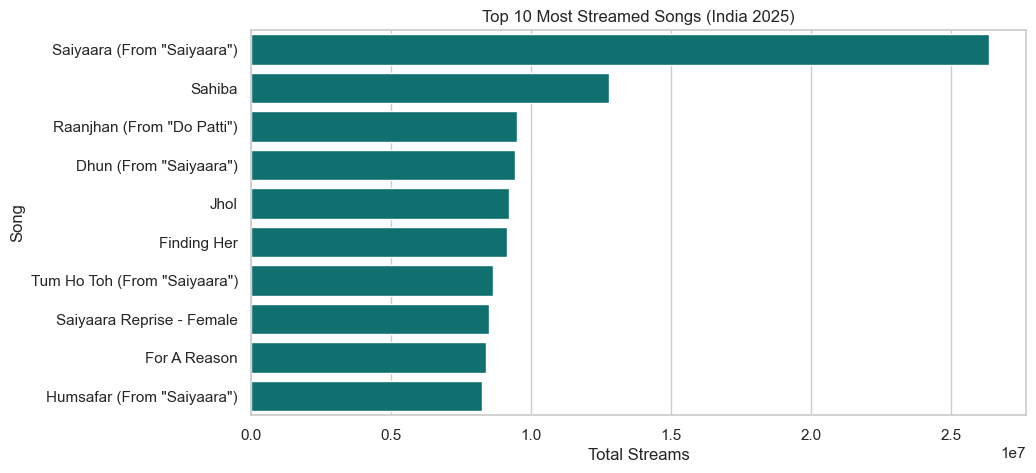

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_songs, x="streams", y="track_name", color="teal")
plt.title("Top 10 Most Streamed Songs (India 2025)")
plt.xlabel("Total Streams")
plt.ylabel("Song")
plt.show()


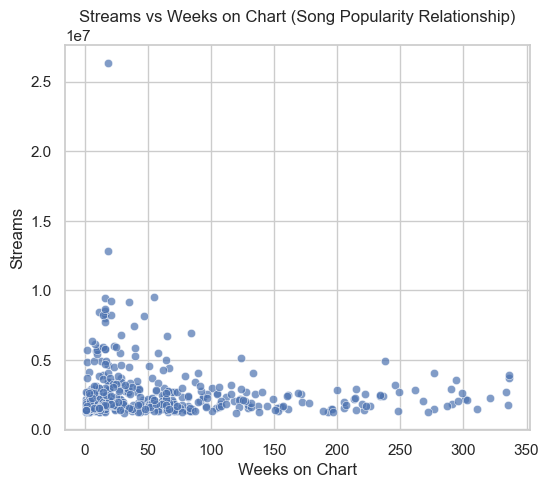

In [46]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=songs, x="weeks_on_chart", y="streams", alpha=0.7)
plt.title("Streams vs Weeks on Chart (Song Popularity Relationship)")
plt.xlabel("Weeks on Chart")
plt.ylabel("Streams")
plt.show()


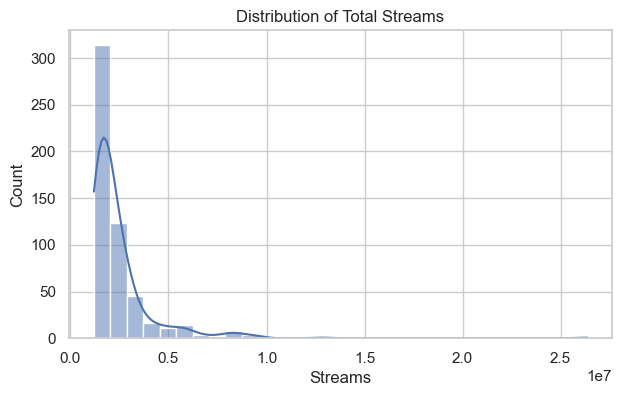

In [47]:
plt.figure(figsize=(7,4))
sns.histplot(songs["streams"], bins=30, kde=True)
plt.title("Distribution of Total Streams")
plt.xlabel("Streams")
plt.show()


In [48]:
# Total streams, total songs, and average weeks per artist
artist_stats = (
    artists.groupby("artist_names", as_index=False)
           .agg({
               "track_name": "nunique",
               "streams": "sum",
               "weeks_on_chart": "mean"
           })
           .rename(columns={"track_name": "total_songs", "streams": "total_streams", "weeks_on_chart": "avg_weeks"})
           .sort_values("total_streams", ascending=False)
)

artist_stats.head(10)


,artist_names,total_songs,total_streams,avg_weeks
70,Arijit Singh,60,148079061,122.866667
356,Pritam,50,102502271,93.620000
193,Irshad Kamil,17,80339913,39.294118
510,Tanishk Bagchi,14,62684186,19.000000
237,Karan Aujla,23,61314405,35.434783
462,Shreya Ghoshal,25,60562284,56.160000
138,Faheem Abdullah,7,60519590,25.857143
50,Amitabh Bhattacharya,22,58751153,49.954545
410,Sachin-Jigar,21,55514109,61.666667
54,Anirudh Ravichander,20,45584528,13.900000


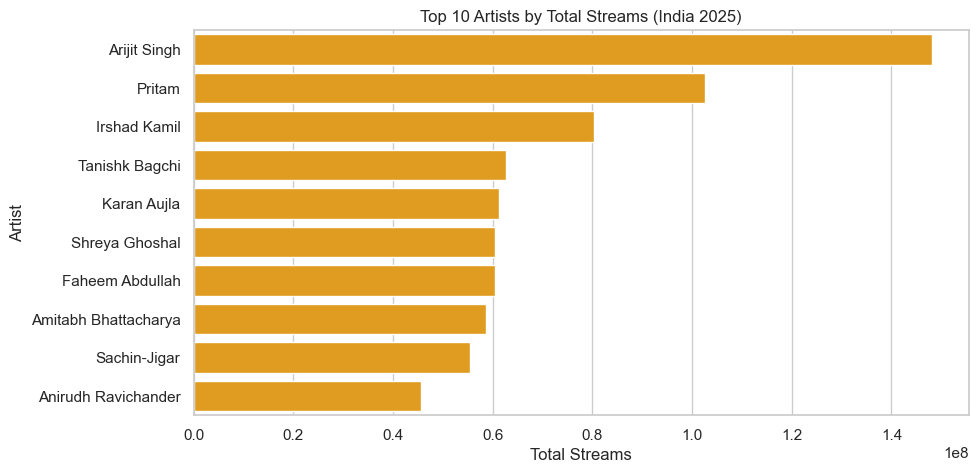

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data=artist_stats.head(10), x="total_streams", y="artist_names", color="orange")
plt.title("Top 10 Artists by Total Streams (India 2025)")
plt.xlabel("Total Streams")
plt.ylabel("Artist")
plt.show()


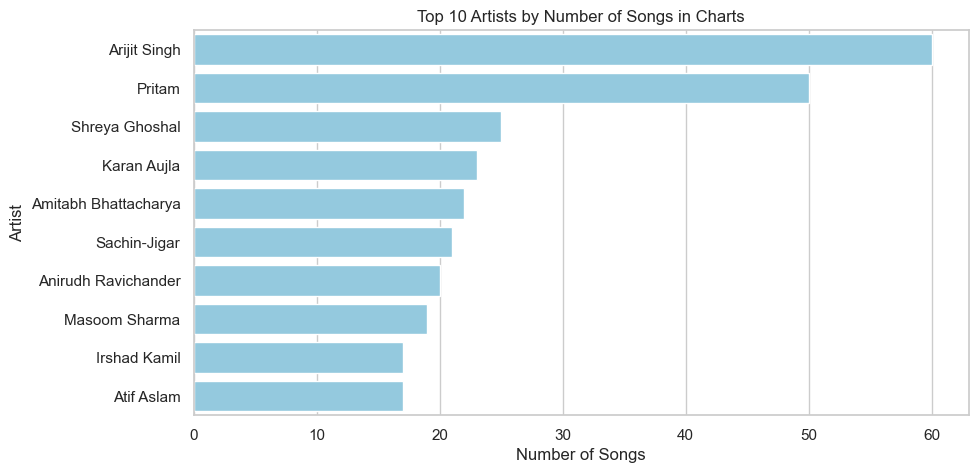

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=artist_stats.sort_values("total_songs", ascending=False).head(10),
            x="total_songs", y="artist_names", color="skyblue")
plt.title("Top 10 Artists by Number of Songs in Charts")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.show()


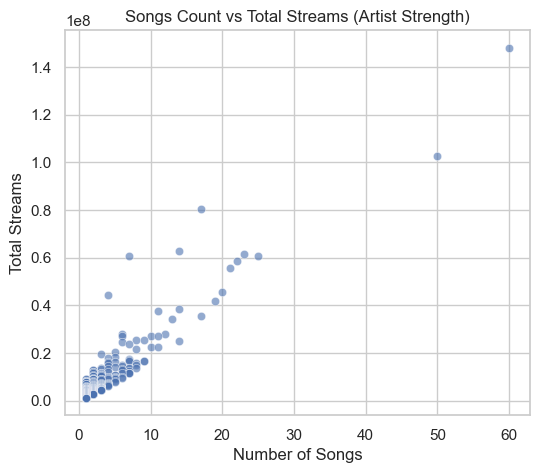

In [51]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=artist_stats, x="total_songs", y="total_streams", alpha=0.6)
plt.title("Songs Count vs Total Streams (Artist Strength)")
plt.xlabel("Number of Songs")
plt.ylabel("Total Streams")
plt.show()


In [52]:
# Identify top 10 songs, then count artist appearances
top10_song_names = top_songs["track_name"].unique()
artists_top10 = artists[artists["track_name"].isin(top10_song_names)]

artists_top10_count = artists_top10["artist_names"].value_counts().head(10)
artists_top10_count


artist_names
Irshad Kamil        3
Tanishk Bagchi      2
Faheem Abdullah     2
Parampara Tandon    2
Arslan Nizami       2
Sachet-Parampara    2
Arijit Singh        1
Aditya Sharma       1
Raj Shekhar         1
Hansika Pareek      1
Name: count, dtype: int64

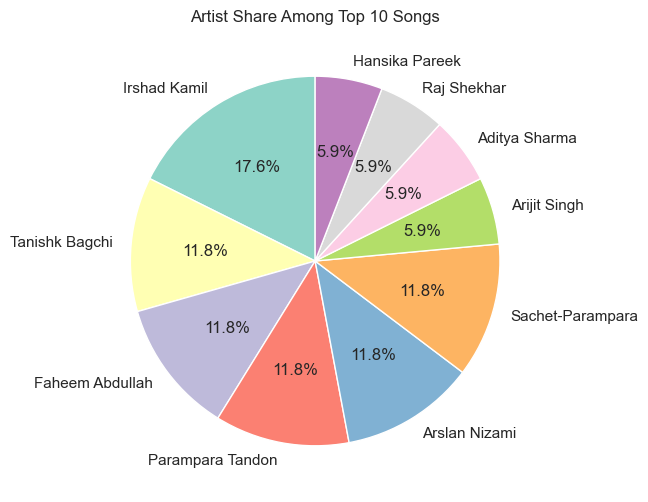

In [53]:
plt.figure(figsize=(6,6))
artists_top10_count.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set3"))
plt.title("Artist Share Among Top 10 Songs")
plt.ylabel("")
plt.show()


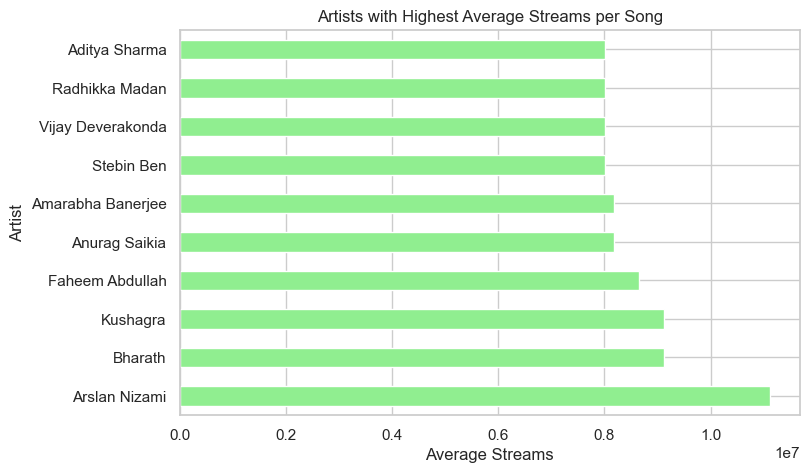

In [54]:
artist_avg_streams = (
    artists.groupby("artist_names")["streams"].mean().sort_values(ascending=False).head(10)
)

artist_avg_streams.plot(kind="barh", color="lightgreen", figsize=(8,5))
plt.title("Artists with Highest Average Streams per Song")
plt.xlabel("Average Streams")
plt.ylabel("Artist")
plt.show()


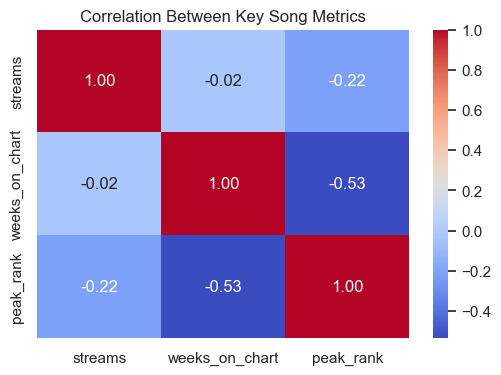

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(songs[["streams", "weeks_on_chart", "peak_rank"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Song Metrics")
plt.show()


In [56]:
artist_stats["popularity_score"] = (artist_stats["total_streams"] * 0.7) + (artist_stats["avg_weeks"] * 0.3 * artist_stats["total_streams"].mean())
artist_stats.sort_values("popularity_score", ascending=False).head(10)


,artist_names,total_songs,total_streams,avg_weeks,popularity_score
40,Alka Yagnik,1,3704179,336.0,6.121549e+08
351,Prashant Ingole,1,1778197,335.0,6.089925e+08
387,Rekha Bhardwaj,1,2232115,321.0,5.839118e+08
32,Akhil,1,1445032,311.0,5.652192e+08
128,Dhvani Bhanushali,1,1445032,311.0,5.652192e+08
15,Abhijit Vaghani,1,1445032,311.0,5.652192e+08
522,Tochi Raina,2,5078189,291.5,5.323860e+08
511,Tanishk-Vayu,1,1306178,248.0,4.508291e+08
39,Alisha Chinai,1,2466356,234.0,4.262428e+08
450,Shawn Mendes,1,1648696,226.0,4.111571e+08


<h1>ML</h1>

In [57]:
# Core libraries
import pandas as pd
import numpy as np

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report
import joblib, os
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
songs = pd.read_csv("data/spotify_songs_view.csv")

print("✅ Data loaded successfully — rows:", len(songs))
songs.head()


✅ Data loaded successfully — rows: 543


,track_name,source,peak_rank,weeks_on_chart,streams
0,0008,Sidhu Moose Wala,111,3,1651890
1,2 Khatole,Tuffan Music,179,11,2955361
2,2 Khatole (Lofi Mix),Tuffan Music,168,32,3048474
3,4 5 Pistol,GSC Music,128,1,1467775
4,48 Rhymes,WM Canada,168,3,1465459


In [58]:
# Derived features capturing performance dynamics
songs["inverse_rank"] = 1 / songs["peak_rank"]
songs["momentum"] = songs["weeks_on_chart"] * songs["inverse_rank"]
songs["popularity_ratio"] = songs["weeks_on_chart"] / songs["peak_rank"]

# Drop missing values (safety)
songs = songs.dropna(subset=["weeks_on_chart", "peak_rank", "streams"])
print("✅ Feature engineering complete.")


✅ Feature engineering complete.


In [59]:
# Features and target
X_reg = songs[["weeks_on_chart", "peak_rank", "momentum", "popularity_ratio"]]
y_reg = songs["streams"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🎯 Linear Regression Metrics:")
print(f"MAE: {mae:,.2f} | RMSE: {rmse:,.2f} | R²: {r2:.4f}")


🎯 Linear Regression Metrics:
MAE: 996,013.57 | RMSE: 1,306,163.42 | R²: 0.0480


In [60]:
# Create popularity classes (quartiles based on streams)
songs["popularity_class"] = pd.qcut(songs["streams"], q=4, labels=["Low", "Medium", "High", "Super Hit"])

# Prepare features
X_clf = songs[["weeks_on_chart", "peak_rank", "momentum", "popularity_ratio"]]
y_clf = songs["popularity_class"]

# Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Train classifier
rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf.fit(X_train_c, y_train_c)

# Predict
y_pred_c = rf.predict(X_test_c)

# Evaluate accuracy
acc = accuracy_score(y_test_c, y_pred_c)
print(f"🎵 Random Forest Classifier Accuracy: {acc:.4f}")

# Optional: Classification Report
print("\nDetailed Report:\n", classification_report(y_test_c, y_pred_c))


🎵 Random Forest Classifier Accuracy: 0.3945

Detailed Report:
               precision    recall  f1-score   support

        High       0.32      0.22      0.26        27
         Low       0.59      0.37      0.45        27
      Medium       0.37      0.41      0.39        27
   Super Hit       0.37      0.57      0.45        28

    accuracy                           0.39       109
   macro avg       0.41      0.39      0.39       109
weighted avg       0.41      0.39      0.39       109



In [61]:
# Define thresholds (these are rough real-world standards)
best_model = None
best_type = None

if r2 > 0.3:
    best_model = lr
    best_type = "Regression"
    print(f"✅ Selected Best Model: Linear Regression (R²={r2:.3f})")
elif acc > 0.6:
    best_model = rf
    best_type = "Classification"
    print(f"✅ Selected Best Model: Random Forest Classifier (Accuracy={acc:.3f})")
else:
    best_model = rf
    best_type = "Classification"
    print(f"⚠️ Neither model perfect; keeping Classification for interpretability.")


⚠️ Neither model perfect; keeping Classification for interpretability.


In [62]:
# Create models folder if not exists
os.makedirs("models", exist_ok=True)

# Save model
model_path = f"models/tunetrends_best_{best_type.lower()}.pkl"
joblib.dump(best_model, model_path)

print(f"💾 Best model saved successfully → {model_path}")


💾 Best model saved successfully → models/tunetrends_best_classification.pkl


In [63]:
# Load back the saved model
loaded_model = joblib.load(model_path)
print("✅ Model loaded successfully from disk:", type(loaded_model))

# Test sample prediction
sample = pd.DataFrame({
    "weeks_on_chart": [8],
    "peak_rank": [5],
    "momentum": [8/5],
    "popularity_ratio": [8/5]
})

# Predict based on model type
if best_type == "Regression":
    print("Predicted Streams:", loaded_model.predict(sample)[0])
else:
    print("Predicted Popularity:", loaded_model.predict(sample)[0])


✅ Model loaded successfully from disk: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Predicted Popularity: Super Hit


In [64]:
print("🏁 Summary — TuneTrends Model Comparison")
print(f"Linear Regression R²: {r2:.4f}")
print(f"Random Forest Accuracy: {acc:.4f}")
print(f"✅ Best Model Type: {best_type}")
print(f"✅ Saved To: {model_path}")



🏁 Summary — TuneTrends Model Comparison
Linear Regression R²: 0.0480
Random Forest Accuracy: 0.3945
✅ Best Model Type: Classification
✅ Saved To: models/tunetrends_best_classification.pkl


/var/folders/6q/38qnlh5s1yj26mb7yd18brf00000gn/T/ipykernel_3104/481095492.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison, x="Model", y="Score", palette="coolwarm")
/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


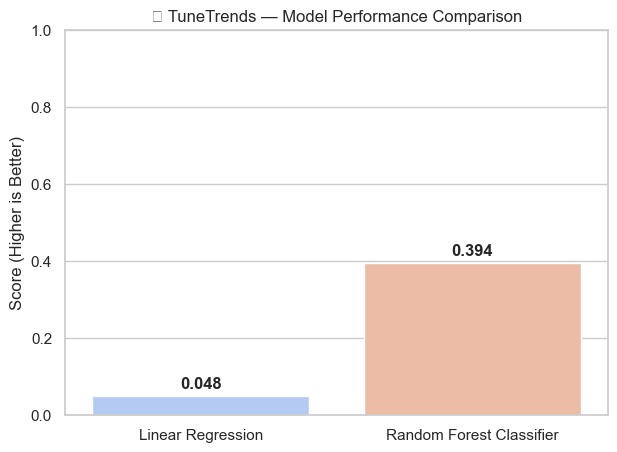

In [65]:
# Prepare performance data for visual comparison
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Classifier"],
    "Score": [r2, acc],
    "Metric": ["R²", "Accuracy"]
})

plt.figure(figsize=(7,5))
sns.barplot(data=comparison, x="Model", y="Score", palette="coolwarm")
plt.title("🎯 TuneTrends — Model Performance Comparison")
plt.ylim(0, 1)
plt.ylabel("Score (Higher is Better)")
plt.xlabel("")
for i, row in comparison.iterrows():
    plt.text(i, row["Score"] + 0.02, f"{row['Score']:.3f}", ha="center", fontweight="bold")
plt.show()


/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


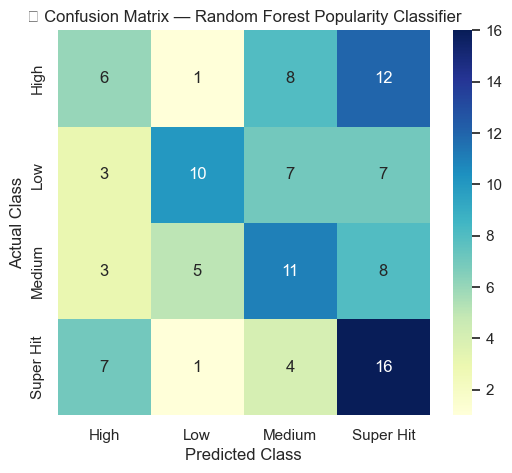

In [66]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c),
            annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=rf.classes_,
            yticklabels=rf.classes_)

plt.title("🧠 Confusion Matrix — Random Forest Popularity Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


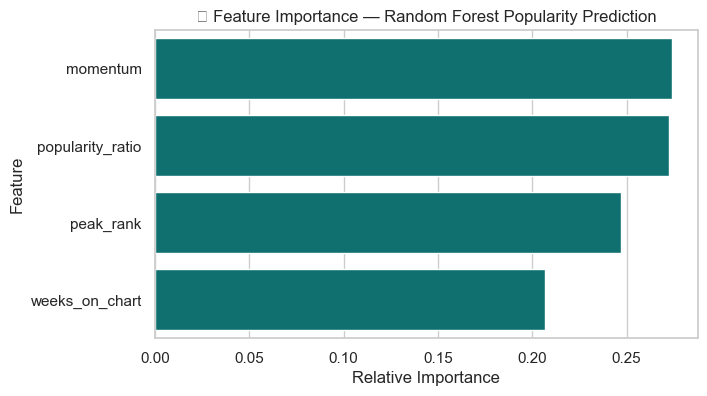

In [67]:
importance = pd.DataFrame({
    "Feature": X_clf.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=importance, x="Importance", y="Feature", color="teal")
plt.title("📈 Feature Importance — Random Forest Popularity Prediction")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()


/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


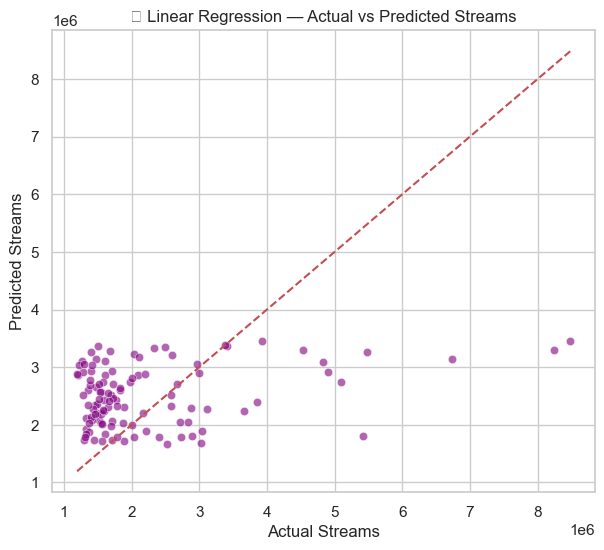

In [68]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, color="purple", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Streams")
plt.ylabel("Predicted Streams")
plt.title("🎵 Linear Regression — Actual vs Predicted Streams")
plt.show()


In [69]:
summary = pd.DataFrame({
    "Metric": ["R² (Regression)", "Accuracy (Classifier)"],
    "Score": [r2, acc],
    "Best Model": [best_type, best_type]
})
summary.style.background_gradient(cmap="cool")


,Metric,Score,Best Model
0,R² (Regression),0.048001,Classification
1,Accuracy (Classifier),0.394495,Classification


In [70]:
print(f"🏆 Final Selected Model: {best_type}")
print(f"💾 Saved as: {model_path}")


🏆 Final Selected Model: Classification
💾 Saved as: models/tunetrends_best_classification.pkl


In [72]:
!jupyter nbconvert --to html TuneTrends_Analysis_Final.ipynb


[NbConvertApp] WARNING | pattern 'TuneTrends_Analysis_Final.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]